# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, I will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The dataset used contains information on 426K cars to ensure speed of processing.  Our goal is to understand what factors make a car more or less expensive.  As a result of the analysis, I will provide clear recommendations to my client -- a used car dealership -- as to what consumers value in a used car.

To frame the task, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem. A brief overview of CRISP-DM is [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).

### Business Understanding


*   <strong>Develop a regression model</strong> to forecast used car prices based
*   <strong>Employ feature importance analysis/engineering to quantify the relative impact of car attributes (make, model, mileage, condition, age, etc.) on the target variable (price).</strong>

### Data Understanding

After considering the business understanding, next step is to get familiar with the data. Some of the steps in this phase are:


*   load the data, print a sample of the dataset to check which features are provided and their type
*   Check for missing data or Duplicates
*   Remove Outliers (car priced too high or 0)
*   Drop redundant features
*   Drop useless features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/vehicles.csv")

In [3]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
61251,7316655286,SF bay area,23990,2013.0,audi,s5 prestige coupe 2d,good,6 cylinders,gas,81232.0,clean,other,WAU3GAFR3DA002326,NaN,NaN,coupe,black,ca
267169,7311486843,buffalo,6500,2008.0,bmw,328i,excellent,6 cylinders,gas,93000.0,clean,manual,NaN,rwd,NaN,sedan,black,ny
20853,7302826666,little rock,42024,2020.0,chevrolet,silverado 1500,NaN,NaN,gas,32150.0,clean,automatic,NaN,4wd,NaN,pickup,NaN,ar
354741,7314276111,knoxville,30988,2020.0,subaru,wrx,NaN,NaN,gas,6623.0,clean,automatic,JF1VA1A63L9810630,NaN,NaN,NaN,blue,tn
149620,7310284302,"st louis, MO",39990,2013.0,ford,f750,good,6 cylinders,diesel,31587.0,clean,automatic,3FRXF7FA3DV038442,rwd,full-size,truck,white,il
290319,7311992957,cincinnati,35990,2020.0,dodge,challenger r/t coupe 2d,good,8 cylinders,gas,1548.0,clean,other,2C3CDZBT9LH119053,rwd,NaN,coupe,black,oh
334302,7311273936,philadelphia,5800,2008.0,gmc,envoy,NaN,6 cylinders,gas,114455.0,clean,automatic,1GKDT13S182100981,4wd,NaN,SUV,black,pa
98705,7314273083,jacksonville,7000,2003.0,jaguar,xk8 convertible,excellent,8 cylinders,gas,114687.0,clean,automatic,NaN,rwd,NaN,convertible,black,fl
72623,7316090581,colorado springs,24988,2010.0,mitsubishi,lancer,NaN,NaN,gas,105219.0,clean,automatic,NaN,NaN,compact,sedan,NaN,co
145594,7313756774,southern illinois,23590,2012.0,ford,f150 supercrew cab xlt,good,8 cylinders,gas,53752.0,clean,other,1FTFW1CFXCKE23269,NaN,NaN,pickup,white,il




*   We see from above that the data is related to auto sold in USA so prices are in USD
*   There is also an intuition that this dataset might need a lot of massaging in order to be fed to a regression model, which requires no missing data and numerical features (or features engneering like one hot encoding).


In [4]:
# Let's take a deeper look at the features available:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

We have 18 Features but only 4 are numerical:

*   id
*   year
*   Odometer
*   Price

Some features are useless hence we could drop them:

*   id
*   VIN
*   paint_color

Two features are redundant:

*   State
*   region

Other features don't help with the price forecast:

* 'manufacturer' column has no value as the same manifacturer can have 15000 USD cars and 150000 USD cars (e.g. Chevrolet), hence it can be dropped.

* 'title' value has only few of 'salvage' title that would distort the prediction. Every other entry has either 'clean' value or 'lien' but both of them have no effect on price, hence dropping it too.

As we can assume car price withn a state are comparable, I woul drop region.



In [5]:
df.drop('id', axis=1, inplace=True)
df.drop('title_status', axis=1, inplace=True)
df.drop('manufacturer', axis=1, inplace=True)
df.drop('paint_color', axis=1, inplace=True)
df.drop('region', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   model         421603 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   VIN           265838 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 42.3+ MB


In [6]:
df.shape

(426880, 13)

In [7]:
# check for duplicated column names
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [8]:
# Let's check for N/A values:
df.isna().sum()
# percentage of missing values
df.isna().mean().sort_values()

price           0.000000
state           0.000000
year            0.002823
transmission    0.005988
fuel            0.007058
odometer        0.010307
model           0.012362
type            0.217527
drive           0.305863
VIN             0.377254
condition       0.407852
cylinders       0.416225
size            0.717675
dtype: float64

In [9]:
# By exploring the data we also realize that ~70% of 'size' data are missing, hence we should drop that column as well:
df.drop('size', axis=1, inplace=True)

In [10]:
# By eliminating some meaningless or non useful features let's now check for duplicates row:
df.duplicated().sum()


127880

In [11]:
# As I left the VIN Column in the dataset and being the VIN uniques,
# if we have  rows where VIN, odometer and Price are the same we should
# definitely remove them as duplicates, as it might cause the model to overfit.
df.drop_duplicates(inplace=True)
# Let's check the dataset now:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299000 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         299000 non-null  int64  
 1   year          298138 non-null  float64
 2   model         294763 non-null  object 
 3   condition     185385 non-null  object 
 4   cylinders     182797 non-null  object 
 5   fuel          297086 non-null  object 
 6   odometer      296272 non-null  float64
 7   transmission  297357 non-null  object 
 8   VIN           169505 non-null  object 
 9   drive         210653 non-null  object 
 10  type          230047 non-null  object 
 11  state         299000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 29.7+ MB


In [12]:
# Now we drop the VIN column
df.drop('VIN', axis=1, inplace=True)


Last step of the initial Data Exploration would be to drop the NA values: this will likely further lower the number of data, but before doing that let's further prepare the data removing and transforming the data in the features we have left for the data analysis.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen and general preparation for modeling with `sklearn`.

**Outliers removal**

After dropping several columns and duplicates row in the initial data exploation phase, now let's do more targeted cleanup.

Based on common sense, domain knowledge and initial data exploration, the following kind or rows can be dropped:


*   Cars with price above 350000 USD
*   Cars with price equal to 0
*  Cars with odoeter above 400000 miles



In [13]:
# DROP Cars with price above 350000 USD
df.drop(df.query("price > 350000").index, axis=0, inplace=True)
df.query("price > 350000")


,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,state


In [14]:
# DROP Cars with listed price equal or below 0 USD
df.drop(df.query("price <= 0").index, axis=0, inplace=True)
df.query("price <= 0")


,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,state


In [15]:
# DROP cars with odometer value aboce 400000 miles
df.drop(df.query("odometer > 400000").index, axis=0, inplace=True)
df.query("odometer > 400000")

,price,year,model,condition,cylinders,fuel,odometer,transmission,drive,type,state


In [16]:
# Let's check now the dataset again:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277563 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         277563 non-null  int64  
 1   year          276725 non-null  float64
 2   model         273803 non-null  object 
 3   condition     177474 non-null  object 
 4   cylinders     172990 non-null  object 
 5   fuel          275951 non-null  object 
 6   odometer      276205 non-null  float64
 7   transmission  276332 non-null  object 
 8   drive         196633 non-null  object 
 9   type          213748 non-null  object 
 10  state         277563 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 25.4+ MB


In [17]:
# percentage of column with missing values
df.isna().mean().sort_values()

price           0.000000
state           0.000000
year            0.003019
transmission    0.004435
odometer        0.004893
fuel            0.005808
model           0.013546
type            0.229912
drive           0.291573
condition       0.360599
cylinders       0.376754
dtype: float64

In [18]:
#If I drop all NaN I will be left only with 100000 rows from the original 400000
df_na_dropped=df.dropna(axis=0)
df_na_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100396 entries, 31 to 426878
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         100396 non-null  int64  
 1   year          100396 non-null  float64
 2   model         100396 non-null  object 
 3   condition     100396 non-null  object 
 4   cylinders     100396 non-null  object 
 5   fuel          100396 non-null  object 
 6   odometer      100396 non-null  float64
 7   transmission  100396 non-null  object 
 8   drive         100396 non-null  object 
 9   type          100396 non-null  object 
 10  state         100396 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 9.2+ MB


Another option is to drop columns with high Na ratio:

type, drive, condition, cylinders.

There is no way to do imputation on 23-37% of data: I will rather create a model with less real data than syntetic.

So I will drop the following columns:

drive, condition ad cylinders with percentage of NaN > 29%


In [19]:
df.drop('drive', axis=1, inplace=True)
df.drop('condition', axis=1, inplace=True)
df.drop('cylinders', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277563 entries, 0 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         277563 non-null  int64  
 1   year          276725 non-null  float64
 2   model         273803 non-null  object 
 3   fuel          275951 non-null  object 
 4   odometer      276205 non-null  float64
 5   transmission  276332 non-null  object 
 6   type          213748 non-null  object 
 7   state         277563 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 19.1+ MB


In [20]:
# model feature has too many different values and will cause heavy memory usage,
# so I need to drope it as well.
df.drop('model', axis=1, inplace=True)
# Finally I drop NaN
df.dropna(axis=0, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 209949 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         209949 non-null  int64  
 1   year          209949 non-null  float64
 2   fuel          209949 non-null  object 
 3   odometer      209949 non-null  float64
 4   transmission  209949 non-null  object 
 5   type          209949 non-null  object 
 6   state         209949 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.8+ MB


We finally have a clean dataset.
Let's see how the numerical values correlate:

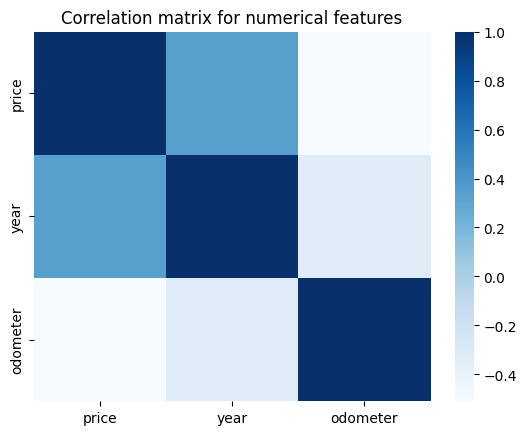

In [59]:
# Correlation Matrix
corr = df.corr(numeric_only=True).round(3)
ax = plt.axes()
sns.heatmap(corr, ax = ax, cmap="Blues")
ax.set_title('Correlation matrix for numerical features')
plt.show()



With only two numerical features, the heatmap highlights what is common sense:

*   price decrease with odometer reading
*   price increase with the car year of manifacturing

In the next phase, we will use One Hot Encoding to transform the non numerical data.




In [22]:
# Last step is to split the dataset in test and train sets:
X = df.drop(['price'], axis=1)
y = df[['price']]

In [23]:
# and introduce train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=12)

In [24]:
# Verify shape:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(167959, 6)
(167959, 1)
(41990, 6)
(41990, 1)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
import numpy as np
import warnings

In [26]:
# Let's use One Hot Encoder to transform our categorical features
# We also want to scale them.
# Let's prepare the transformer
categorical_columns = ["fuel", "transmission", "type", "state"]
numerical_columns = ["year", "odometer"]

In [27]:
preprocessor = make_column_transformer(
    (OneHotEncoder(categories='auto', drop="if_binary", sparse_output=False, handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names

)

**Linear Regression**

In [28]:
# Let's start using linear regresstion
from sklearn.pipeline import make_pipeline
import scipy as sp

model = make_pipeline(
    preprocessor, LinearRegression(),
)

In [29]:
# Fit the model
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'transmission',
                                                   'type', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [30]:
# Calculating the median absolute error
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, model.predict(X_train))
y_pred = model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}
print(scores)

{'MedAE on training set': '4814.00 $', 'MedAE on testing set': '4834.50 $'}


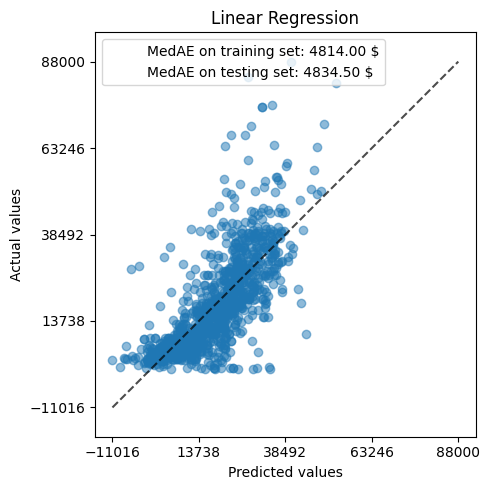

In [31]:
# We can create a chart of this:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Linear Regression")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

**Ridge**

In [32]:
# To describe the dataset as a linear model we use a ridge regressor with a very
# small regularization and to model the logarithm of the Price. We use alpha=1

model_Ridge = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=0.1),func=np.log10, inverse_func=sp.special.exp10
    ),
)

In [35]:
# Fit the model
model_Ridge.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'transmission',
                                                   'type', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=0.1)))])

In [36]:
# Calculating the median absolute error

mae_train = median_absolute_error(y_train, model_Ridge.predict(X_train))
y_pred = model_Ridge.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}
print(scores)

{'MedAE on training set': '4123.08 $', 'MedAE on testing set': '4074.02 $'}


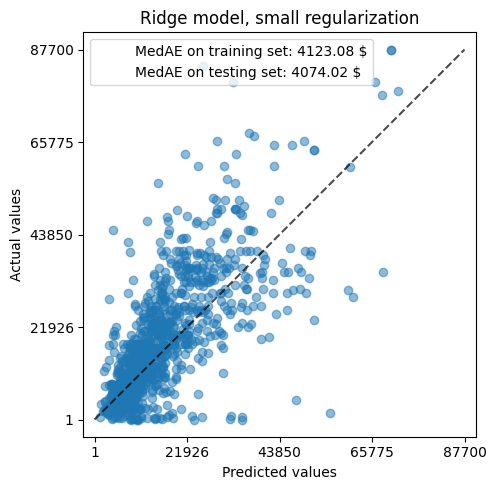

In [37]:
# We can create a chart of this:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

**Lasso**

In [38]:
#Let's now use Lasso

model_lasso = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Lasso(alpha=0.1, random_state=42)
        ),
)

# Fit the model
model_lasso.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.275e+12, tolerance: 3.837e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['fuel', 'transmission',
                                                   'type', 'state']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=Lasso(alpha=0.1,
                                                            random_state=42)))])

In [39]:
# Calculating the median absolute error

mae_train = median_absolute_error(y_train, model_lasso.predict(X_train))
y_pred = model_lasso.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}
print(scores)

{'MedAE on training set': '4812.48 $', 'MedAE on testing set': '4831.00 $'}


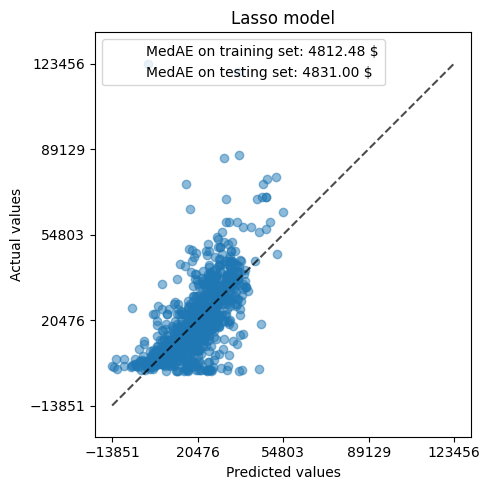

In [40]:
# We can create a chart of this:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Lasso model")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [60]:
# Calculate the mean of the predicted training values
y_train_eval = y_train.copy()
y_train_eval['ridge'] = model_Ridge.predict(X_train)
y_train_eval['lasso'] = model_lasso.predict(X_train)
y_train_eval['linear'] = model.predict(X_train)
y_train_eval.head(10).round(2)
print(y_train_eval.mean())

price     18509.957662
ridge     15323.441418
lasso     18509.957662
linear    18505.809823
dtype: float64


<Axes: title={'center': 'Train Data Performance'}>

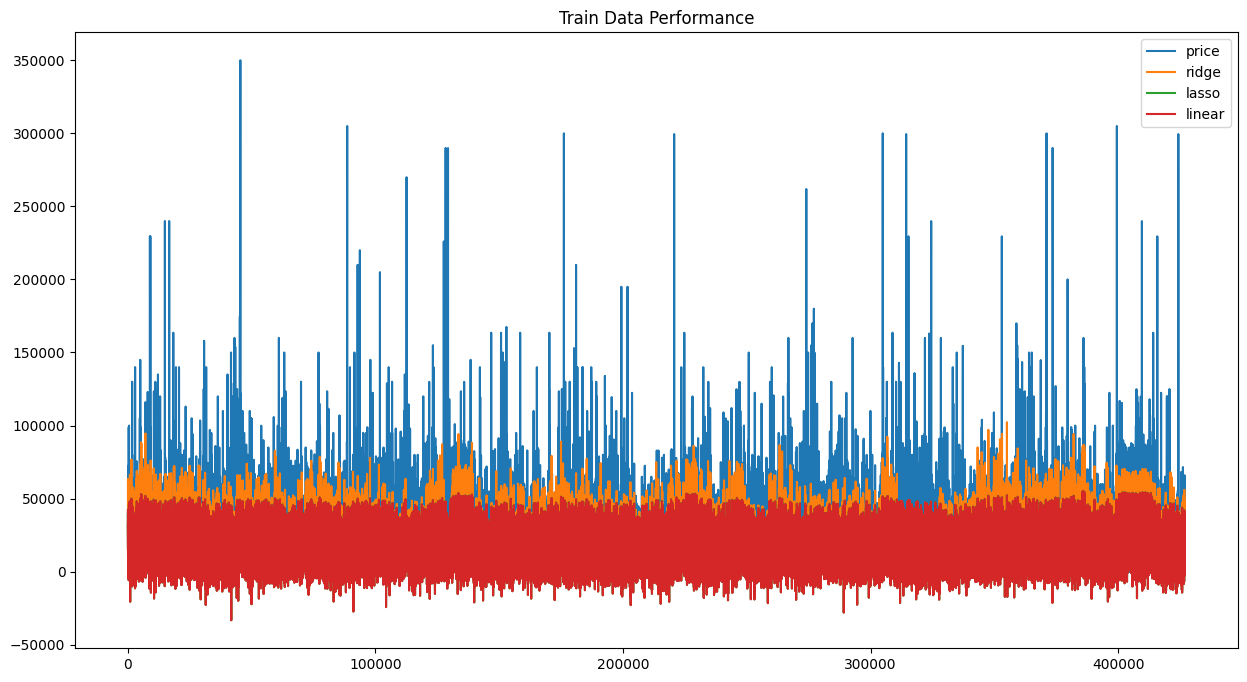

In [61]:
# Visualize Results for training set predictions
y_train_eval.sort_index().plot(kind='line', title="Train Data Performance", figsize=(15,8))

In [62]:
# Calculate the mean of the predicted test values
y_test_eval = y_test.copy()
y_test_eval['ridge'] = model_Ridge.predict(X_test)
y_test_eval['lasso'] = model_lasso.predict(X_test)
y_test_eval['linear'] = model.predict(X_test)
y_test_eval.head(10).round(2)
print(y_test_eval.mean())

price     18356.546630
ridge     15249.952171
lasso     18451.757309
linear    18448.089450
dtype: float64


In [63]:
# Calculate the R-squared score on the prediction of the test dataset:
from sklearn.metrics import r2_score

r2_linear = r2_score(y_test, model.predict(X_test))
print("R-squared for linear regression: "+str(r2))
r2_ridge = r2_score(y_test, model_Ridge.predict(X_test))
print("R-squared for Ridge regression: "+str(r2_ridge))
r2_lasso = r2_score(y_test, model_lasso.predict(X_test))
print("R-squared for Lasso regression: "+str(r2_lasso))


R-squared for linear regression: 0.4287133339128095
R-squared for Ridge regression: 0.4287133339128095
R-squared for Lasso regression: 0.48449447942167234


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

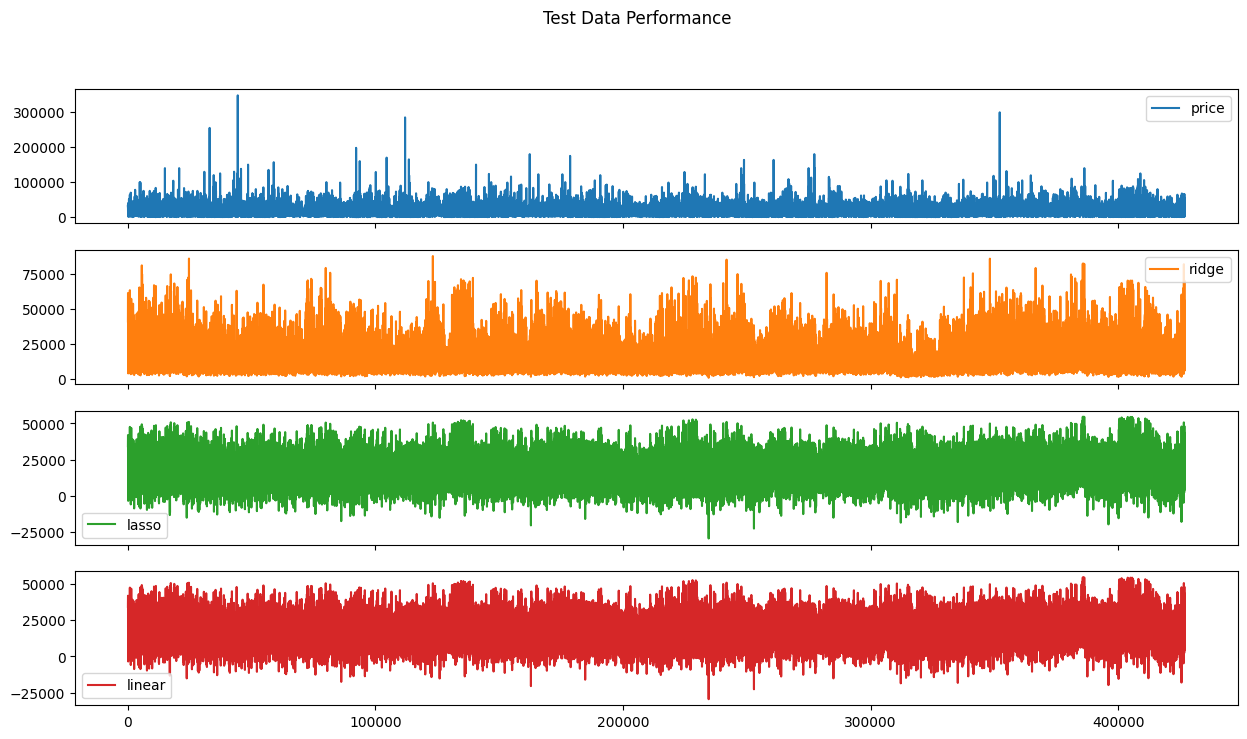

In [64]:
#Visualize Results for test set predictions
y_test_eval.sort_index().plot(kind='line', title="Test Data Performance", figsize=(15,8), subplots=True)

Lasso seems to perform slightly better then ridge and linear. Overall however seem to have the same performances with this dataset. Also changing *alpha* values does not bring any significant change or improvment in the models capability to predict the car price based on their features.

Lasso regularization appears to have the best performances with this dataset, hence we will use that for predicting price of cars based on the selected features.

Let's see what feature influence the most the price:

In [44]:
# Let's get features names and coefficients out:

feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model_lasso[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

coefs


,Coefficients
fuel_diesel,11003.261999
fuel_electric,795.594133
fuel_gas,-2577.624885
fuel_hybrid,-1798.017281
fuel_other,848.582032
...,...
state_wi,-1961.793344
state_wv,2346.205410
state_wy,35.475402
year,2958.554428


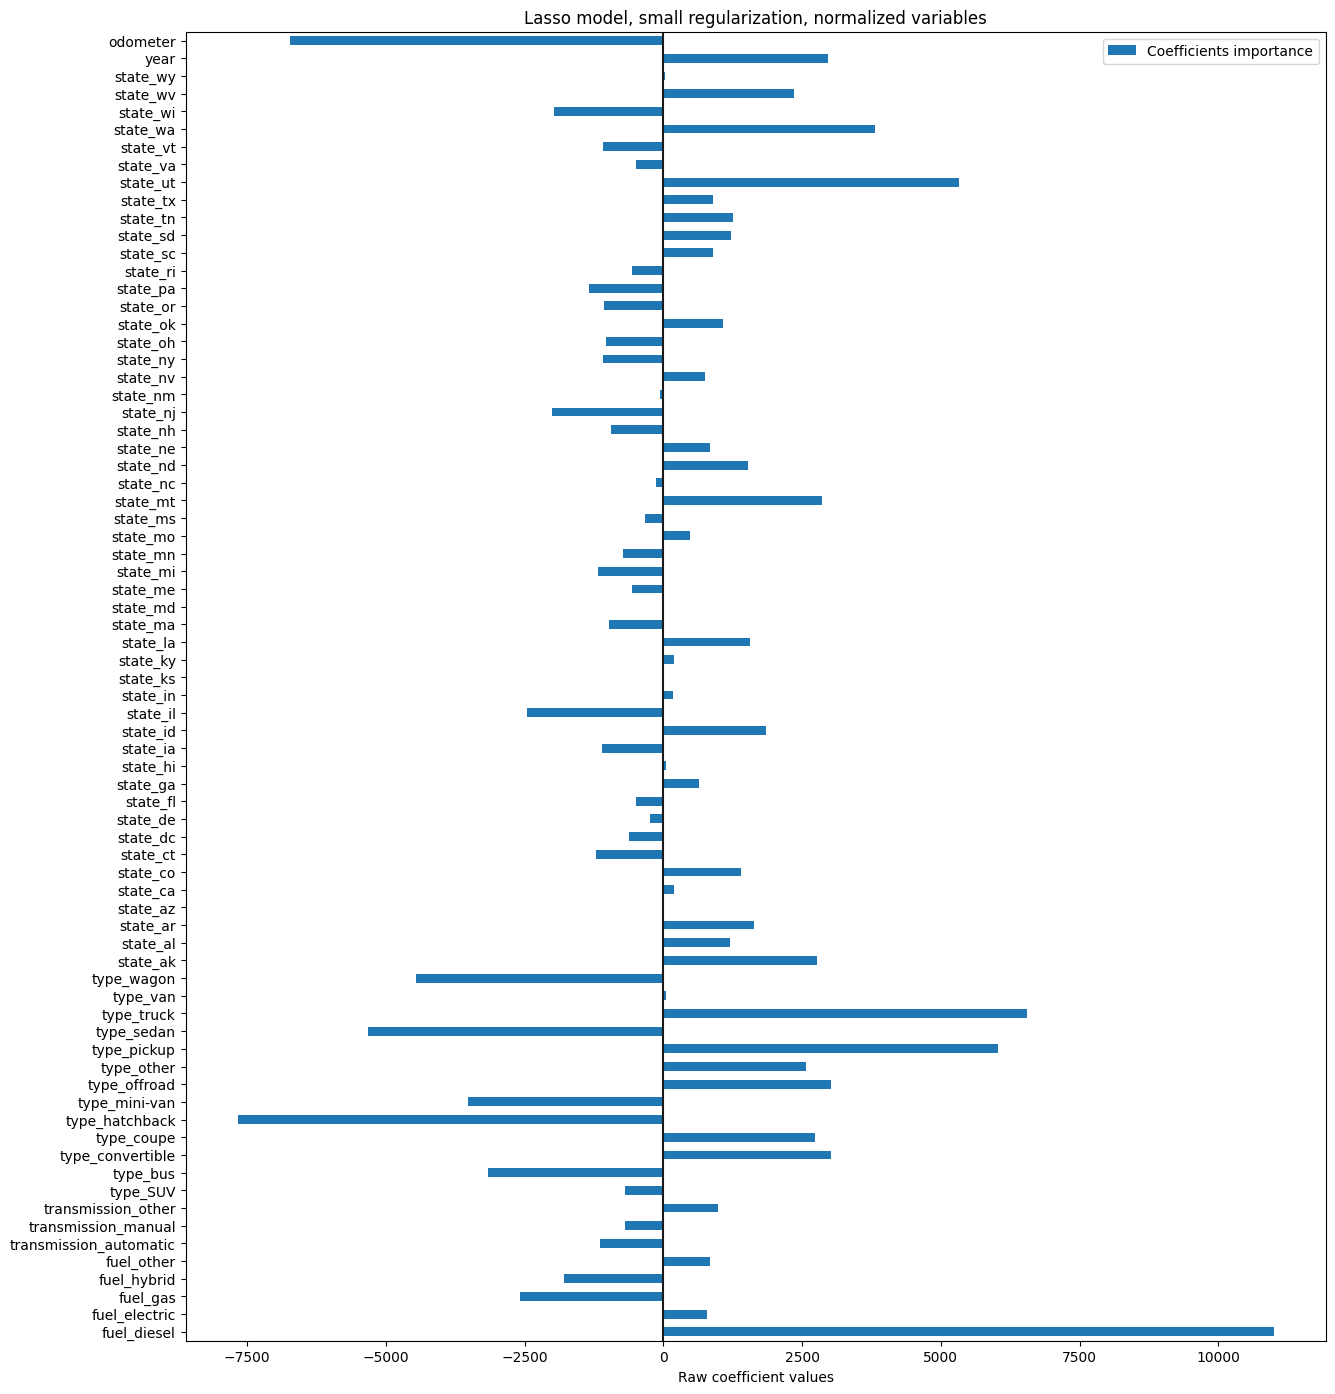

In [45]:
# Let's do some coefficient analysis

coefs = pd.DataFrame(
    model_lasso[-1].regressor_.coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)
coefs.plot.barh(figsize=(19, 17))
plt.title("Lasso model, small regularization, normalized variables")
plt.xlabel("Raw coefficient values")
plt.axvline(x=0, color=".1")
plt.subplots_adjust(left=0.3)

Results are interesting: aside from the obvious that higher value of the odometer lower the car value and the newest the car is the higher is the price, other considerations apply:


*   Pickup trucks contribute significantly to higher price of the car, matching real live observations
*   sedan, wagon and minivan contribute to lower the car price, which is in line with the national trend of consumers shifting to big cars.

Interestingly diesel car have a positive influence to the car price while hybrid and gas tend to go against high price value

Lastly, buying a car in Utah might be more expensive compared to, for exmaple, California so dealers should avoid purchasing cars from there.

